# Esame big data Spironelli Riccardo
> - Per eseguire il codice è necessario installare la libreria `pandasql` (oltre a quelle di base)
> - È stato utilizzato il set di dati completo

In [6]:
#Import necessari 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandasql import sqldf
def pysqldf(q): return sqldf(q, globals())


s1 = pd.read_csv("vehicles.csv")
s1["posting_date"] = pd.to_datetime(s1["posting_date"])


1. Quanti record ci sono nel dataset?

In [9]:
pysqldf("select count() as [Numero Record] from s1")

,Numero Record
0,426880


2. Quante auto ci sono per ciascuna marca? Creare due tabelle:
   - nella prima ordinare i risultati in ordine alfabetico per marca
   - nella seconda ordinare i risultati per numero di auto presenti in ordine decrescente

In [10]:
pysqldf("select manufacturer, count() from s1 group by manufacturer order by manufacturer  ")


,manufacturer,count()
0,None,17646
1,acura,5978
2,alfa-romeo,897
3,aston-martin,24
4,audi,7573
5,bmw,14699
6,buick,5501
7,cadillac,6953
8,chevrolet,55064
9,chrysler,6031


In [11]:
pysqldf("select manufacturer, count() as numero from s1  where manufacturer is not null group by manufacturer order by numero desc ")


,manufacturer,numero
0,ford,70985
1,chevrolet,55064
2,toyota,34202
3,honda,21269
4,nissan,19067
5,jeep,19014
6,ram,18342
7,gmc,16785
8,bmw,14699
9,dodge,13707


3. Contare le auto raggruppate per marca e quindi per modello
    - Basta mostrare i primi 30 modelli più venduti

In [12]:
pysqldf("select manufacturer, model, count() as numero from s1 group by manufacturer,model order by numero desc limit 30")

,manufacturer,model,numero
0,ford,f-150,8009
1,chevrolet,silverado 1500,5140
2,ram,1500,4069
3,toyota,camry,3133
4,chevrolet,silverado,3021
5,honda,accord,2968
6,jeep,wrangler,2848
7,honda,civic,2799
8,nissan,altima,2779
9,ford,escape,2745


4. Quale è il prezzo medio di vendita delle auto ?

In [13]:
pysqldf("select avg(price) as [media prezzo] from s1 where price > 0")

,media prezzo
0,81477.628049


5. Quale è il prezzo medio delle auto per ciascuna marca?

In [14]:
pysqldf("select manufacturer, avg(price) as [media prezzo] from s1 group by manufacturer")

,manufacturer,media prezzo
0,None,33520.179474
1,acura,19842.869522
2,alfa-romeo,28237.348941
3,aston-martin,53494.541667
4,audi,23574.849993
5,bmw,26740.261446
6,buick,36784.954736
7,cadillac,19439.520926
8,chevrolet,115676.101645
9,chrysler,10442.946609


6. Analisi delle Ferrari presenti
    - Quante sono?
    - Quali modelli sono disponibili?
    - Quali colori sono disponibili?
    - Disegnare un grafico che rappresenti la distribuzione dei colori delle Ferrari in vendita
    - Ci sono delle Ferrari rosse in stato "like new" in vendita a meno di centomila dollari? Dove?

In [3]:
sFerrari = pysqldf("select * from s1 where manufacturer like 'ferrari'")
pysqldf("select count() as [numero ferrari] from sFerrari")

,numero ferrari
0,95


In [16]:
pysqldf("select count(model) as [numero modelli] from sFerrari")

,numero modelli
0,77


<BarContainer object of 7 artists>

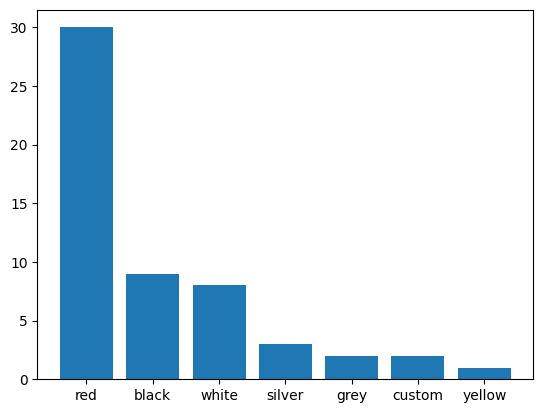

In [17]:
res = pysqldf("select paint_color as colore, count() as numero from sFerrari where colore not null group by paint_color order by numero desc")
plt.bar(res["colore"], res["numero"])


In [5]:
# Ci sono delle Ferrari rosse in stato "like new" in vendita a meno di centomila dollari? Dove?
pysqldf("select (lat||long) as coordinate, state, region from sFerrari where condition like 'like new' and paint_color like 'red' and price < 100000")

,coordinate,state,region
0,34.2218-118.9866,ca,ventura county


# Esercizio bonus

- Trovare i ford f-150 in condizioni eccellenti ordinando i risultati per data di pubblicazione più recente

In [11]:
pysqldf("select manufacturer, model,price, year from s1 where condition like 'excellent' and year not null and manufacturer not null and model not null order by posting_date desc , year desc")

,manufacturer,model,price,year
0,chevrolet,silverado 1500,34000,2018.0
1,ford,f250 superduty 4wd xl,8975,2007.0
2,ford,f250 xl 4wd,8975,2007.0
3,toyota,pickup,4000,1989.0
4,ram,2500 4x4,12500,2001.0
...,...,...,...,...
96776,dodge,durango,18997,2013.0
96777,dodge,dart,119,2013.0
96778,mercury,grand marquis,4500,2000.0
96779,ford,f-150,6500,2002.0
